In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np


In [2]:
Pp = pd.read_csv('dataset2_Prod_potential.csv')
Pp = Pp.drop(columns=['Unnamed: 0'])

In [3]:
pp_arr = Pp.values

In [4]:
import scipy.interpolate

In [5]:
pp_arr.flatten()[:169738].shape

(169738,)

In [17]:
b = np.zeros((pp_arr.shape[0]*2, pp_arr.shape[1]))
b[::2, ::] = np.copy(pp_arr)
x, y = np.where(b)
#f = scipy.interpolate.interp2d(x[:10000], y[:10000], pp_arr.flatten()[:10000], kind='cubic')
#b[b==0] = np.interp(np.argwhere(b==0), np.nonzero(b), b[b!=0])

In [25]:
def interp(array, scale=1, method='cubic'):
    x = np.arange(array.shape[1]*scale)[::scale]
    y = np.arange(array.shape[0]*scale)[::scale]
    x_in_grid, y_in_grid = np.meshgrid(x,y)
    x_out, y_out = np.meshgrid(np.arange(max(x)+1),np.arange(max(y)+1))
    array = np.ma.masked_invalid(array)
    x_in = x_in_grid[~array.mask]
    y_in = y_in_grid[~array.mask]
    return scipy.interpolate.griddata((x_in, y_in), array[~array.mask].reshape(-1),(x_out, y_out), method=method)

In [28]:
final_array = interp(pp_arr,scale=2,method='linear')

In [54]:
labels_x = np.arange(0,200,5)
labels_x

array([  0,   5,  10,  15,  20,  25,  30,  35,  40,  45,  50,  55,  60,
        65,  70,  75,  80,  85,  90,  95, 100, 105, 110, 115, 120, 125,
       130, 135, 140, 145, 150, 155, 160, 165, 170, 175, 180, 185, 190,
       195])

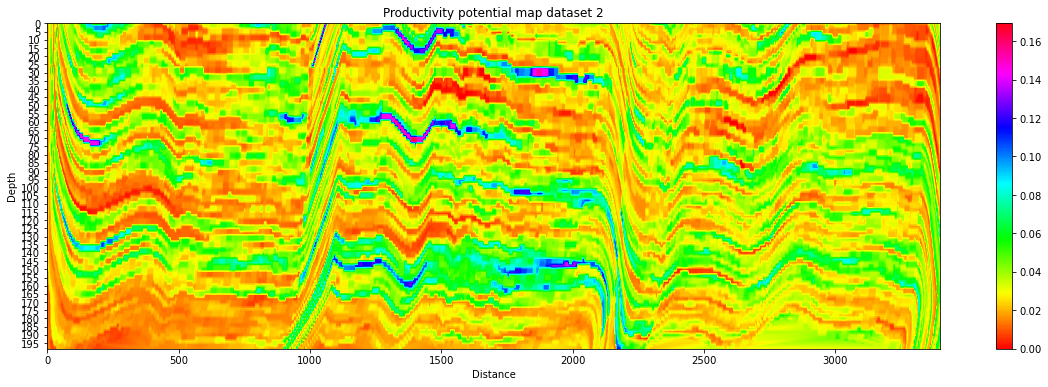

In [55]:
fig4, ax = plt.subplots()
fig4.set_size_inches(20,6)
plt.title('Productivity potential map dataset 2')
plt.xlabel('Distance')
plt.ylabel('Depth')
ax.set_yticks(labels_x)
ax.set_yticklabels(labels_x)
p_map = plt.imshow(final_array, cmap='hsv',aspect='auto')
bar = plt.colorbar(p_map)
plt.show()

In [25]:
traj = np.zeros_like(pp_arr)
for i in range (pp_arr.shape[1]):
    
    traj[40,i] = 1

In [29]:
import plotly.graph_objects as go
from PIL import Image
fig = go.Figure()

fig.add_layout_image(

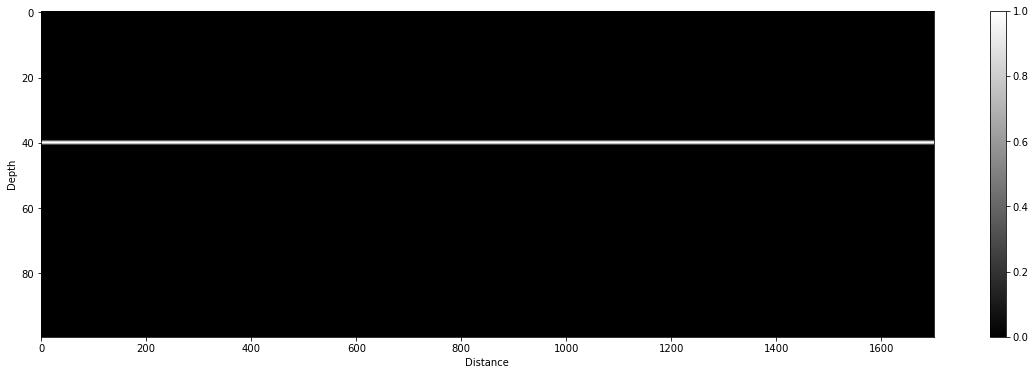

In [37]:
fig4, ax = plt.subplots()
fig4.set_size_inches(20,6)
plt.xlabel('Distance')
plt.ylabel('Depth, m')
p_map = plt.imshow(traj, cmap='gray',aspect='auto')
bar = plt.colorbar(p_map)
plt.show()

In [ ]:
class TrajectoryGenerator:
    def __init__(self,trajectory):
        self.trajectory = trajectory